In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [0]:
train_dir='/content/drive/My Drive/Capstone 2/train_dir'
validation_dir='/content/drive/My Drive/Capstone 2/test_dir'


In [0]:
train_planet_dir = os.path.join(train_dir, 'planet')
train_not_dir= os.path.join(train_dir, 'notplanet')
val_planet_dir= os.path.join(validation_dir, 'planet')
val_not_dir= os.path.join(validation_dir, 'notplanet')

In [0]:
num_planets_tr=len(os.listdir(train_planet_dir))
num_not_tr=len(os.listdir(train_not_dir))

num_planets_val = len(os.listdir(val_planet_dir))
num_not_val = len(os.listdir(val_not_dir))

total_train = num_planets_tr + num_not_tr
total_val = num_planets_val + num_not_val

In [7]:
print('total training planet images:', num_planets_tr)
print('total training not images:', num_not_tr)

print('total validation planet images:', num_planets_val)
print('total validation not images:', num_not_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training planet images: 619
total training not images: 489
total validation planet images: 100
total validation not images: 100
--
Total training images: 1108
Total validation images: 200


In [0]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1108 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 200 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

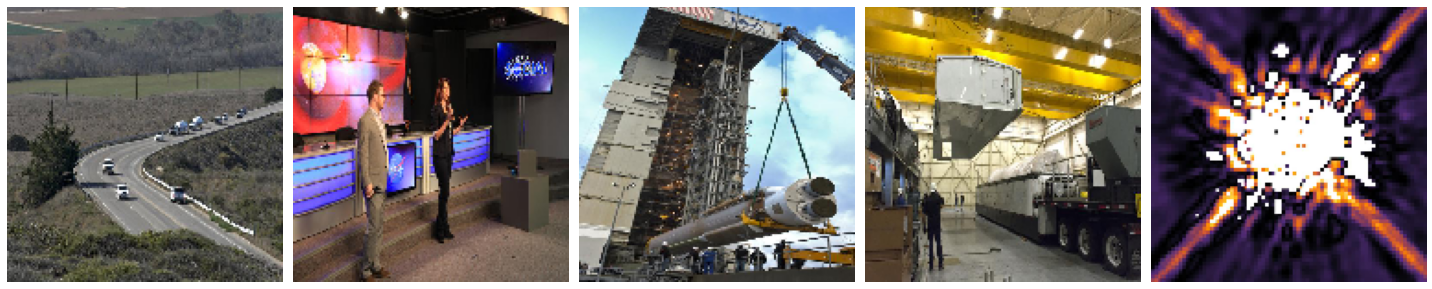

In [14]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
Dense(1)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [23]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
110/110 [==============================] - 36s 328ms/step - loss: 0.5835 - accuracy: 0.6655 - val_loss: 0.7794 - val_accuracy: 0.5650
Epoch 2/15
110/110 [==============================] - 36s 325ms/step - loss: 0.4212 - accuracy: 0.7996 - val_loss: 0.7123 - val_accuracy: 0.6450
Epoch 3/15
110/110 [==============================] - 36s 325ms/step - loss: 0.3152 - accuracy: 0.8661 - val_loss: 0.8745 - val_accuracy: 0.5500
Epoch 4/15
110/110 [==============================] - 36s 325ms/step - loss: 0.2308 - accuracy: 0.8962 - val_loss: 0.8627 - val_accuracy: 0.6450
Epoch 5/15
110/110 [==============================] - 36s 325ms/step - loss: 0.1613 - accuracy: 0.9353 - val_loss: 1.0627 - val_accuracy: 0.6750
Epoch 6/15
110/110 [==============================] - 36s 327ms/step - loss: 0.1175 - accuracy: 0.9581 - val_loss: 0.9967 - val_accuracy: 0.6150
Epoch 7/15
110/110 [==============================] - 36s 328ms/step - loss: 0.0830 - accuracy: 0.9663 - val_loss: 1.1742 - val_ac

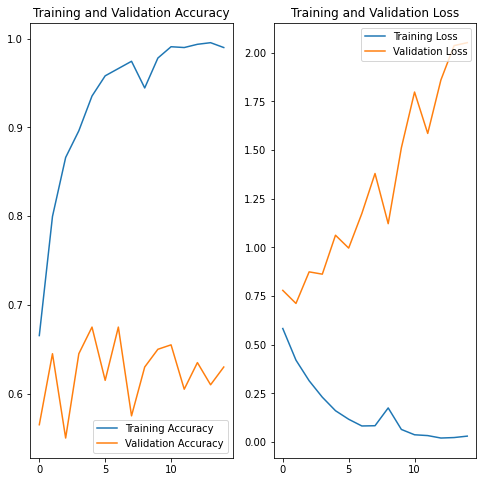

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Repeated with more data and more EPOCS. got slightly worse result. Seems to hover around 75% accuracy.

In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)  

553467904/553467096 [==============================] - 3s 0us/step


In [0]:
for layer in model2.layers[:-2]:
    layer.trainable = False    

In [0]:
num_classes = 2
model2.add(Dense(1 ))

In [41]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model2.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
#try this next
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

#model2.compile(
#    optimizer=opt,
#    loss='categorical_crossentropy',
#    metrics=['accuracy']
#)

#model2.fit(train_data_gen, steps_per_epoch=total_train , validation_data=val_data_gen, validation_steps=22, epochs=12, verbose=2)

In [0]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 244
IMG_WIDTH = 244

In [31]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(244, 244),
                                                           class_mode='binary')

Found 1108 images belonging to 2 classes.


In [32]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(244, 244),
                                                              class_mode='binary')

Found 200 images belonging to 2 classes.


In [43]:
history2 = model2.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
110/110 [==============================] - 795s 7s/step - loss: 0.5122 - accuracy: 0.7641 - val_loss: 0.7680 - val_accuracy: 0.6800
Epoch 2/15
110/110 [==============================] - 794s 7s/step - loss: 0.3376 - accuracy: 0.8379 - val_loss: 0.4593 - val_accuracy: 0.8450
Epoch 3/15
110/110 [==============================] - 794s 7s/step - loss: 0.2499 - accuracy: 0.8936 - val_loss: 0.2332 - val_accuracy: 0.9100
Epoch 4/15
110/110 [==============================] - 798s 7s/step - loss: 0.2483 - accuracy: 0.8962 - val_loss: 0.2764 - val_accuracy: 0.8650
Epoch 5/15
110/110 [==============================] - 796s 7s/step - loss: 0.2299 - accuracy: 0.9044 - val_loss: 0.3220 - val_accuracy: 0.8850
Epoch 6/15
110/110 [==============================] - 800s 7s/step - loss: 0.2139 - accuracy: 0.9135 - val_loss: 0.2957 - val_accuracy: 0.8700
Epoch 7/15
110/110 [==============================] - 798s 7s/step - loss: 0.2347 - accuracy: 0.9026 - val_loss: 0.4093 - val_accuracy: 0.8550

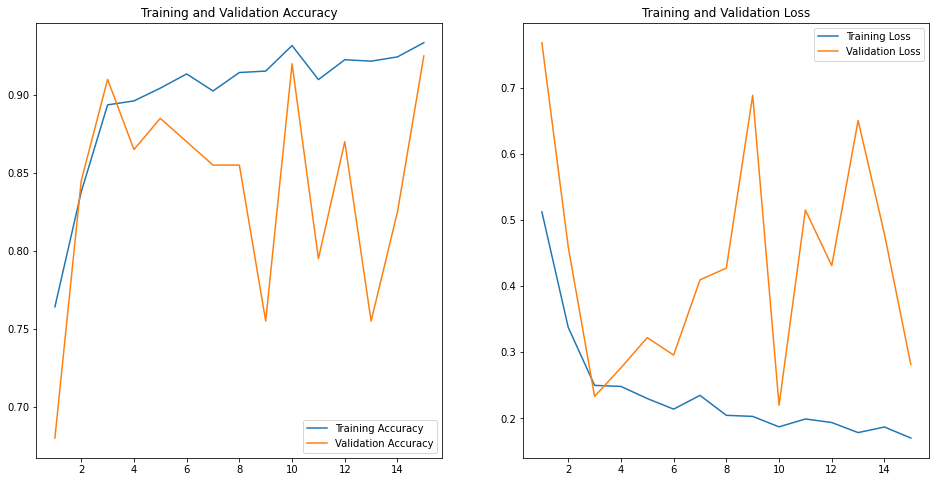

In [45]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(1,epochs+1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
type(model2)

tensorflow.python.keras.engine.sequential.Sequential

In [0]:
model2.save('NASApredictor_vgg16.h5')

In [47]:
type(history2)

tensorflow.python.keras.callbacks.History

In [0]:
model.save('NASApredictor.h5')

In [0]:
test_steps_per_epoch = np.math.ceil(val_data_gen.samples / val_data_gen.batch_size)

predictions = model2.predict_generator(val_data_gen, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [0]:
true_classes = val_data_gen.classes
class_labels = list(val_data_gen.class_indices.keys())  

In [0]:
from sklearn import metrics
#report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
#print(report)

In [166]:
metrics.confusion_matrix(true_classes, predicted_classes)

array([[100,   0],
       [100,   0]])

In [0]:
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
#import numpy as np
 
#model= VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/My Drive/Capstone 2/pizza_dir/1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model2.predict(x)

In [169]:
features

array([[5.019447]], dtype=float32)

In [171]:
img_path = '/content/drive/My Drive/Capstone 2/pizza_dir/2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model2.predict(x)
features

array([[-0.26911584]], dtype=float32)

In [173]:
img_path = '/content/drive/My Drive/Capstone 2/pizza_dir/3.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model2.predict(x)
features

array([[5.0592356]], dtype=float32)

In [174]:
img_path = '/content/drive/My Drive/Capstone 2/pizza_dir/neptune.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model2.predict(x)
features

array([[5.5208745]], dtype=float32)

In [0]:
pizza_dir='/content/drive/My Drive/Capstone 2/pizza_dir'



In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd


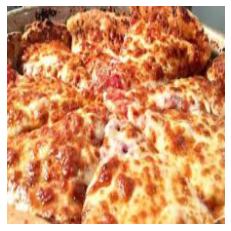

In [175]:
unknown_img = plt.imread('/content/drive/My Drive/Capstone 2/pizza_dir/2.jpeg')
unknown_img = cv.resize(unknown_img, (224, 224))
plt.imshow(unknown_img)
plt.axis('off')
plt.show()

In [153]:
unknown_img_NN = np.expand_dims(unknown_img, axis=0)
num_predict = model2.predict(unknown_img_NN)
num_df = pd.DataFrame(num_predict)
num_predict = np.array(num_predict)
num_predict = tf.argmax(num_predict, axis=1)
num_predict
num_df[0]

0    3.326014
Name: 0, dtype: float32

In [154]:
model2.predict_classes(unknown_img_NN)

array([[1]], dtype=int32)

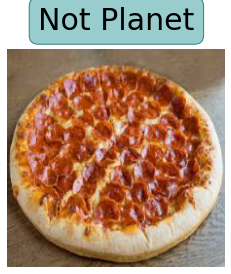

          0
0  3.326014


In [157]:
window_name = 'Planet Prediction'
  

# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2

# Text to display
unknown_img_NN = np.expand_dims(unknown_img, axis=0)
num_predict = model2.predict(unknown_img_NN)

num_df = pd.DataFrame(num_predict)
num_predict = np.array(num_predict)
num_predict = tf.argmax(num_predict, axis=1)
text_predict = ''
if np.array(num_df) < 3.5:
    text_predict = 'Not Planet'
elif np.array(num_df) > 3.5:
    text_predict = 'Planet'


plt.axis('off')
plt.imshow(unknown_img)
plt.text(112, -30, text_predict, size=30, rotation=0,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(0.2, 0.5, 0.5),
                   fc=(0.6, 0.8, 0.8),
                   )
         )
plt.show()
print(num_df)

In [61]:
pizza_planet_dir = os.path.join(pizza_dir, 'planet')
pizza_not_dir= os.path.join(pizza_dir, 'notplanet')
pizza_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our pizza data

pizza_data_gen = pizza_image_generator.flow_from_directory(batch_size=1,
                                                              directory=pizza_dir,
                                                              target_size=(224, 224),
                                                              class_mode='binary')

pizza_num_planets = len(os.listdir(pizza_planet_dir))
pizza_num_not = len(os.listdir(pizza_not_dir))

print(pizza_num_planets +pizza_num_not)

Found 100 images belonging to 2 classes.
100


In [0]:
MODEL= tf.keras.models.load_model('/content/drive/My Drive/Capstone 2/NASApredictor_vgg16.h5')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from PIL import Image, ImageOps
import cv2 as cv
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import imutils



In [0]:
def plots(ims, figsize=(24, 12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims - np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((1, 2, 3, 0))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

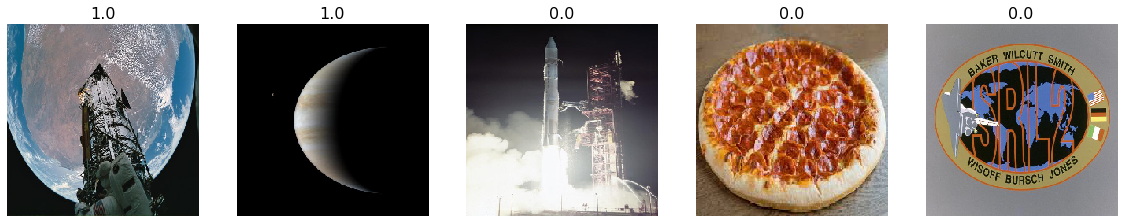

In [41]:
test_imgs, test_labels = next(pizza_data_gen)
plots(test_imgs, titles=test_labels)

In [50]:
type(test_imgs)

numpy.ndarray

In [0]:
predictions = MODEL.predict_generator(pizza_data_gen, steps=100, verbose=0)


In [63]:
df_cm = pd.DataFrame(predictions)
df_cm

,0
0,-6.502899
1,-5.363268
2,-8.056441
3,-4.439709
4,-0.516467
...,...
95,-4.916173
96,-5.985453
97,1.898245
98,-4.668131


In [76]:
1/(1+np.exp(df_cm[0][0]*-1))

0.0014968435948379967

In [81]:
for i in range(len(df_cm)):
  df_cm[1][i]=(1/(1 + np.exp(-1*df_cm[0][i])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
for i in range(len(df_cm)):
  df_cm[2][i]=np.round(df_cm[1][i],0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
df_cm[1]

0     0.001497
1     0.004664
2     0.000317
3     0.011662
4     0.373679
        ...   
95    0.007274
96    0.002509
97    0.869693
98    0.009302
99    0.730641
Name: 1, Length: 100, dtype: float64

In [92]:
df_cm[2].value_counts()

0.0    54
1.0    46
Name: 2, dtype: int64

In [0]:
true_classes = pizza_data_gen.classes
class_labels = list(pizza_data_gen.class_indices.keys())  

In [95]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [94]:
type(true_classes)

numpy.ndarray

In [0]:
predicted_classes=np.array(df_cm[2]).astype(int)

In [98]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [99]:
metrics.confusion_matrix(true_classes, predicted_classes)

array([[31, 19],
       [23, 27]])

In [101]:
metrics.accuracy_score(true_classes,predicted_classes)

0.58

In [103]:
for i in range(len(df_cm)):
  df_cm[1][i]=np.exp(df_cm[0][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
for i in range(len(df_cm)):
  df_cm[2][i]=df_cm[1][i]/sum(df_cm[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
df_cm[2]

0     2.324095e-07
1     7.264224e-07
2     4.915400e-08
3     1.829303e-06
4     9.249712e-05
          ...     
95    1.135953e-06
96    3.899221e-07
97    1.034724e-03
98    1.455738e-06
99    4.205319e-04
Name: 2, Length: 100, dtype: float64

In [0]:
def softmax(x):
  expo=[np.exp(i) for i in x]
  tot=sum(expo)
  return np.exp(x)/tot

In [57]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
predictions=[]
for img in pizza_data_gen:
  #unknown_img = plt.imread(pic)
  #unknown_img = cv.resize(pic, (224, 224))
  #x=np.expand_dims(pic, axis=0)
  x = image.img_to_array(img)
  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  predictions.append(MODEL.predict(x))

ValueError: ignored